# Homework 1

## Question 1

In [1]:
import numpy as np
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([[-1,1], [1,-1], [-1,1]])

In [2]:
A + B

array([[0, 3],
       [4, 3],
       [4, 7]])

In [3]:
A * B

array([[-1,  2],
       [ 3, -4],
       [-5,  6]])

In [4]:
np.dot(A.T, B)

array([[-3,  3],
       [-4,  4]])

In [5]:
np.dot(A, B.T)

array([[ 1, -1,  1],
       [ 1, -1,  1],
       [ 1, -1,  1]])

In [6]:
np.dot(A, B)

ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [7]:
from __future__ import print_function
import torch
torch_A = torch.Tensor(A)
torch_B = torch.Tensor(B)

In [8]:
torch_A + torch_B

tensor([[0., 3.],
        [4., 3.],
        [4., 7.]])

In [9]:
torch_A * torch_B

tensor([[-1.,  2.],
        [ 3., -4.],
        [-5.,  6.]])

In [10]:
torch_A.transpose(0, 1).mm(torch_B)

tensor([[-3.,  3.],
        [-4.,  4.]])

In [11]:
torch_A.mm(torch_B.transpose(0, 1))

tensor([[ 1., -1.,  1.],
        [ 1., -1.,  1.],
        [ 1., -1.,  1.]])

In [12]:
torch_A.transpose(0, 1).mm(torch_B.transpose(0, 1))

RuntimeError: size mismatch, m1: [2 x 3], m2: [2 x 3] at /Users/soumith/b101_2/2019_02_08/wheel_build_dirs/wheel_3.6/pytorch/aten/src/TH/generic/THTensorMath.cpp:940

## Question 2

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

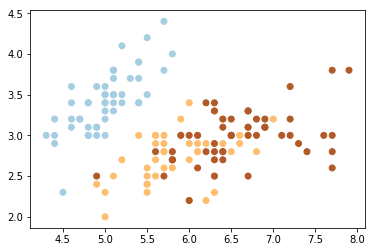

In [14]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

plt.scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.Paired)

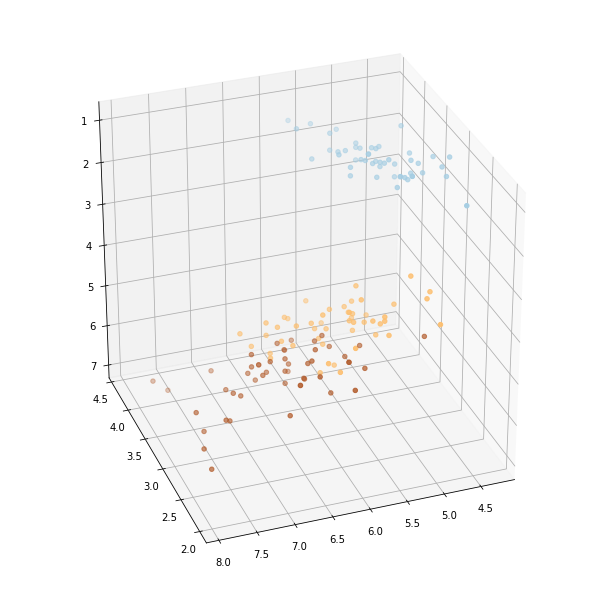

In [15]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:,0],X[:,1],X[:,2],c=Y,cmap=plt.cm.Paired)

## Question 3
Answer provided in the write-up section

## Question 4
Answer provided in the write-up section

## Question 5
I did this question 2 ways. The first uses pandas and a DataFrame, making use of the get_dummies method to make one hot encoded columns. The rows of this resulting dataframe can be sent to PyTorch to make tensors. 

The second way, I followed instructions from discussion and just hard-coded a matrix from 5 input vectors.

For both, I one-hot encoded the 'Make' and 'Color' columns. This allows us to optimize our future machine learning methods used by speeding up the computation of features. Instead of having to search for the strings representing each make or color, we can now use the booleans(faster lookup) to make our methods faster.

In [16]:
import pandas as pd
heights = [144, 162, 150, 149, 158]
widths = [71, 76, 70, 71, 78]
makes = ['Apple', 'Samsung', 'Samsung', 'Huawei', 'Apple']
colors = ['Gold', 'Silver', 'Black', 'Silver', 'Black']
df = pd.DataFrame(data = {'Height': heights, 'Width': widths, 'Make': makes, 'Color': colors})

#create dummy vars
to_dummy = ['Make','Color']
for var in to_dummy:
    cat='var'+'_'+var
    cat = pd.get_dummies(df[var], prefix=var)
    dummies = df.join(cat)
    df = dummies

data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in to_dummy]

df=df[to_keep]
df

,Height,Width,Make_Apple,Make_Huawei,Make_Samsung,Color_Black,Color_Gold,Color_Silver
0,144,71,1,0,0,0,1,0
1,162,76,0,0,1,0,0,1
2,150,70,0,0,1,1,0,0
3,149,71,0,1,0,0,0,1
4,158,78,1,0,0,1,0,0


In [17]:
x1 = [144, 71, 1, 0, 0, 0, 1, 0]
x2 = [162, 76, 0, 0, 1, 0, 0, 1]
x3 = [150, 70, 0, 0, 1, 1, 0, 0]
x4 = [149, 71, 0, 1, 0, 0, 0, 1]
x5 = [158, 78, 1, 0, 0, 1, 0, 0]

out_matrix = [x1, x2, x3, x4, x5]
out_matrix

[[144, 71, 1, 0, 0, 0, 1, 0],
 [162, 76, 0, 0, 1, 0, 0, 1],
 [150, 70, 0, 0, 1, 1, 0, 0],
 [149, 71, 0, 1, 0, 0, 0, 1],
 [158, 78, 1, 0, 0, 1, 0, 0]]

## Question 6


In [18]:
import math

def l1_norm(x):
    return torch.abs(x).sum()

def l1_norm_2(x):
    ret = 0
    for i in x:
        ret += abs(i)
    return ret

def l2_norm(x):
    ret = 0
    for i in x:
        ret += i * i
    return math.sqrt(ret)


torch_1 = torch.Tensor([5, 12, -13])
torch_2 = torch.Tensor([0, 4, -4])

print(l1_norm_2(torch_1))
print(l1_norm_2(torch_2))

print(l2_norm(torch_1))
print(l2_norm(torch_2))

tensor(30.)
tensor(8.)
18.384776310850235
5.656854249492381


## Question 7


In [19]:
def cos_sim(a, b):
    return a.dot(b) / (l2_norm(a) * l2_norm(b))

torch_1 = torch.Tensor([4, -5, -3])
torch_2 = torch.Tensor([4, 5, 3])

cos_sim(torch_1, torch_2)

tensor(-0.3600)

In [20]:
torch_1 = torch.Tensor([-1, 1, -1])
torch_2 = torch.Tensor([1, -1, -1])

cos_sim(torch_1, torch_2)

tensor(-0.3333)